<a href="https://colab.research.google.com/github/12sandra/Data-Science-Projects/blob/main/Unsupervised_Casestudyipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Adult data: Unsupervised Learning

##EDA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans,AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram,linkage
from sklearn.decomposition import PCA

In [2]:
census_data=pd.read_csv("/content/adult_dataset.csv")

In [3]:
census_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39.0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40.0,NaN,<=50K
1,50.0,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13.0,United-States,<=50K
2,38.0,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40.0,United-States,<=50K
3,53.0,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40.0,United-States,<=50K
4,28.0,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,<=50K


In [4]:
census_data.nunique()

,0
age,82
workclass,9
fnlwgt,27981
education,16
education-num,16
marital-status,7
occupation,15
relationship,6
race,5
sex,2


In [5]:
census_data.isnull().sum()

,0
age,2378
workclass,3212
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,3207
relationship,0
race,0
sex,0


In [6]:
census_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47529 entries, 0 to 47528
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             45151 non-null  float64
 1   workclass       44317 non-null  object 
 2   fnlwgt          47529 non-null  int64  
 3   education       47529 non-null  object 
 4   education-num   47529 non-null  int64  
 5   marital-status  47529 non-null  object 
 6   occupation      44322 non-null  object 
 7   relationship    47529 non-null  object 
 8   race            47529 non-null  object 
 9   sex             47529 non-null  object 
 10  capital-gain    47529 non-null  int64  
 11  capital-loss    47529 non-null  int64  
 12  hours-per-week  45159 non-null  float64
 13  native-country  44906 non-null  object 
 14  income          47529 non-null  object 
dtypes: float64(2), int64(4), object(9)
memory usage: 5.4+ MB


In [7]:
census_data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,45151.000000,4.752900e+04,47529.000000,47529.000000,47529.000000,45159.000000
mean,38.679143,1.895573e+05,10.078731,1082.198826,87.580425,40.447618
std,13.920573,1.056430e+05,2.571407,7472.843641,403.303097,12.618293
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175090e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781420e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.375230e+05,12.000000,0.000000,0.000000,45.000000
max,255.000000,1.490400e+06,16.000000,99999.000000,4356.000000,250.000000


checking for duplicates

In [8]:
census_data.duplicated().sum()

np.int64(15)

In [9]:
census_data = census_data.drop_duplicates()

In [10]:
census_data.shape

(47514, 15)

In [11]:
census_data.replace('?', np.nan, inplace=True)


In [12]:
census_data.nunique()

,0
age,82
workclass,8
fnlwgt,27981
education,16
education-num,16
marital-status,7
occupation,14
relationship,6
race,5
sex,2


array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'fnlwgt'}>],
       [<Axes: title={'center': 'education-num'}>,
        <Axes: title={'center': 'capital-gain'}>],
       [<Axes: title={'center': 'capital-loss'}>,
        <Axes: title={'center': 'hours-per-week'}>]], dtype=object)

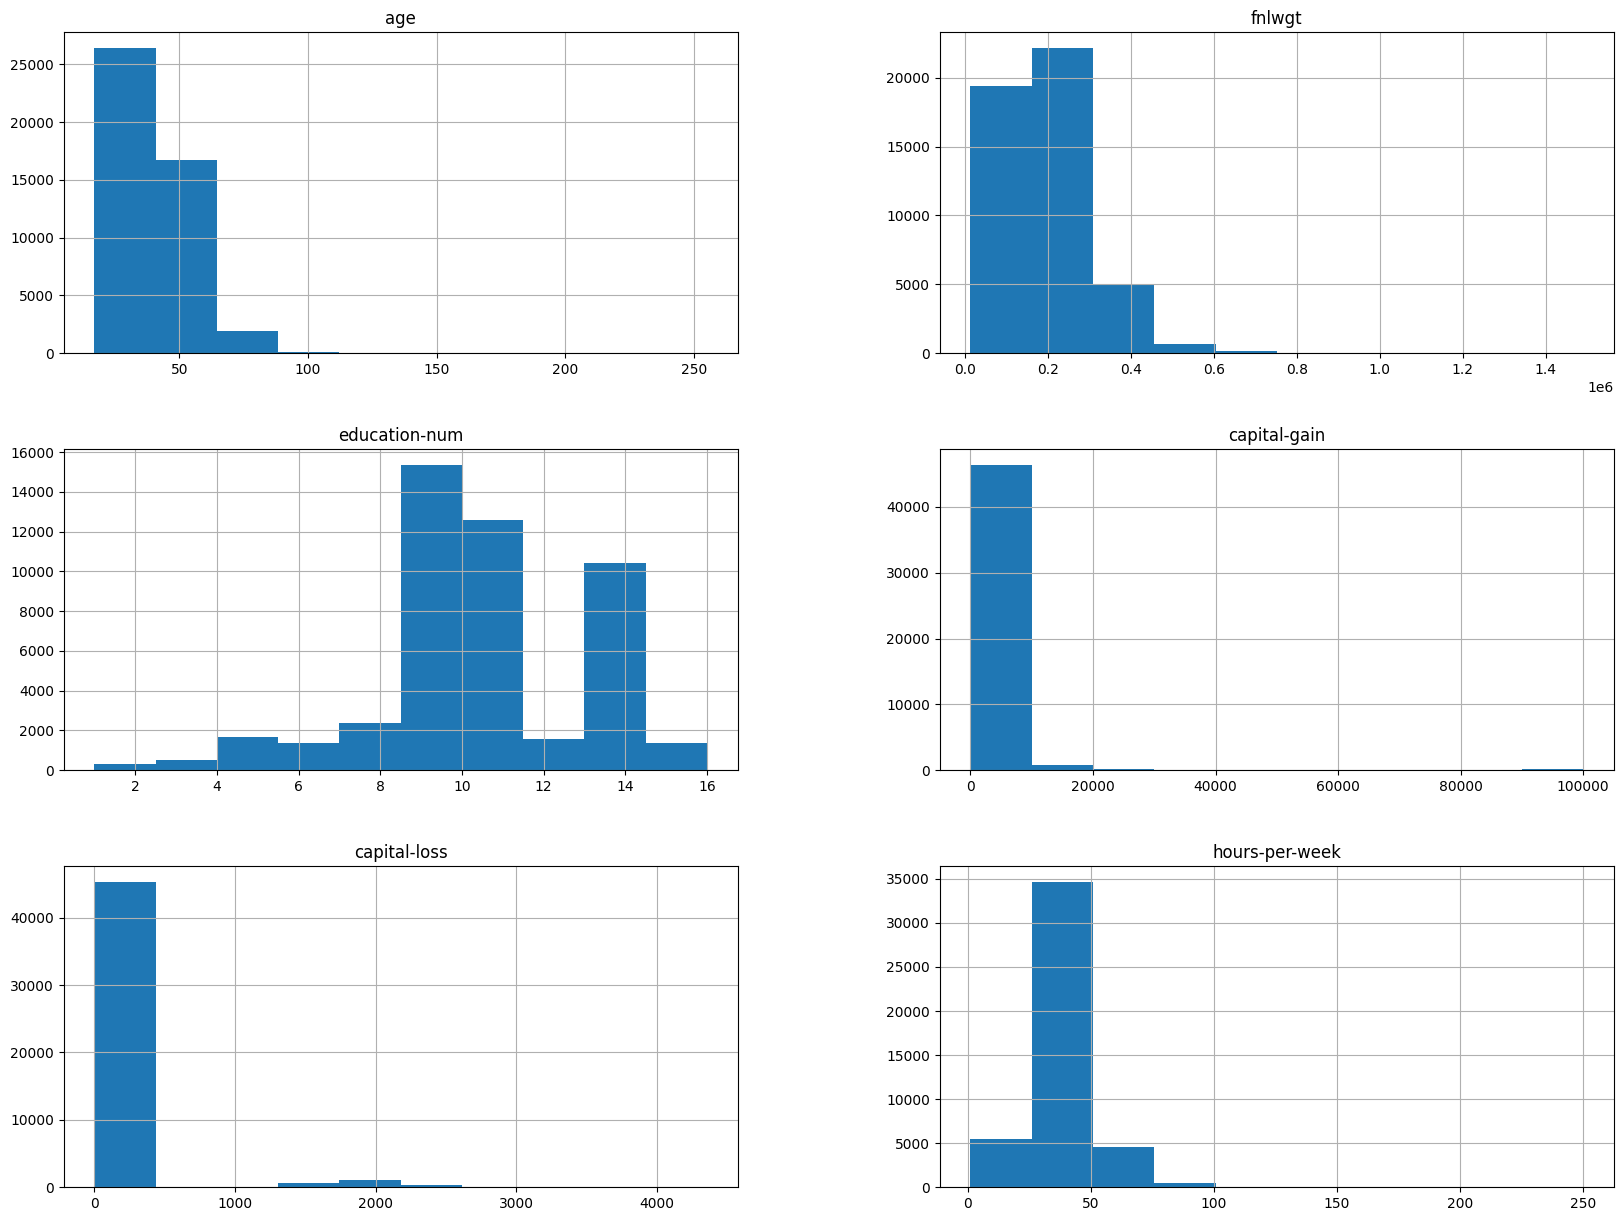

In [13]:
#histogram
freqgraph=census_data.select_dtypes(include='number')
freqgraph.hist(figsize=(20,15))

Checking for null values


In [14]:
census_data[census_data.isin(['?']).any(axis=1)]


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income


In [15]:
census_data.isnull().sum()

,0
age,2378
workclass,4975
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,4965
relationship,0
race,0
sex,0


numerical values replaced with median

In [16]:
#null_numerical=['age','hours-per-week']
census_data['age']=census_data['age'].fillna(census_data['age'].median())
census_data['hours-per-week']=census_data['hours-per-week'].fillna(census_data['hours-per-week'].median())

Categorical values filled with mode values

In [17]:
null_categorical=['workclass','occupation','native-country','occupation',]
for col in null_categorical:
   census_data[col]=census_data[col].fillna(census_data[col].mode()[0])


Checking For Outliers

<Axes: >

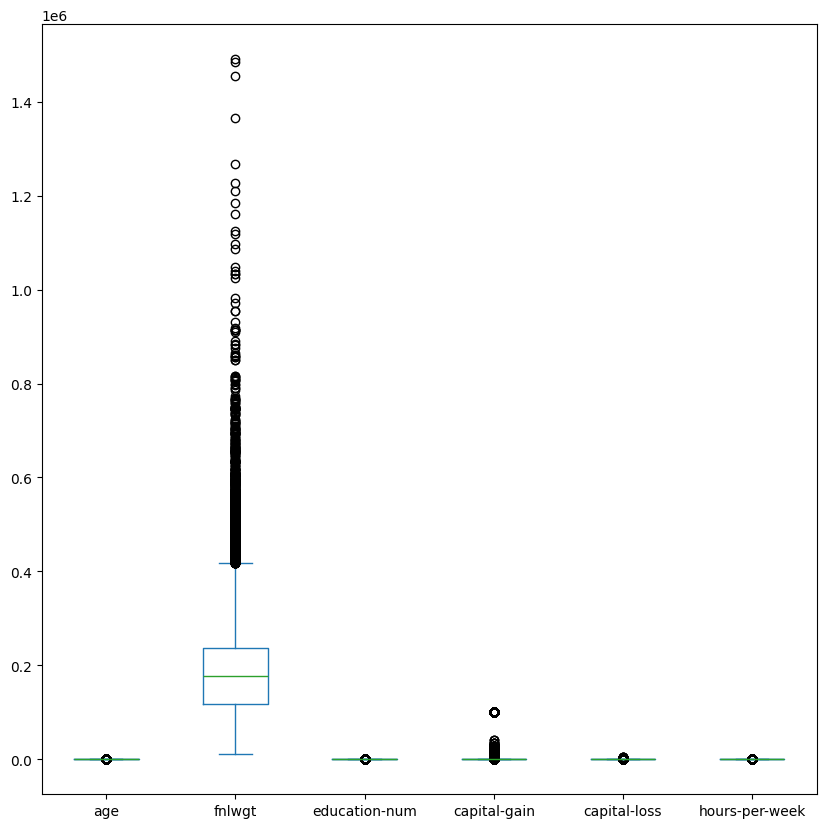

In [18]:
census_data.plot(kind='box',figsize=(10,10))

Handling Outliers

In [19]:
cols = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

for col in cols:
    Q1 = census_data[col].quantile(0.25)
    Q3 = census_data[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # CLIPPING
    census_data[col] = census_data[col].clip(lower, upper)

Encoding

In [20]:
numerical_cols= census_data.select_dtypes(include=['float64','int64']).columns
categorical_cols = census_data.select_dtypes(include=['object', 'category']).columns
print(categorical_cols)
print(numerical_cols)

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country', 'income'],
      dtype='object')
Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')


In [21]:
adult_df1 = census_data.select_dtypes(include=['number'])
corr= adult_df1.corr()
corr

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076082,0.041438,NaN,NaN,0.090816
fnlwgt,-0.076082,1.000000,-0.034675,NaN,NaN,-0.019396
education-num,0.041438,-0.034675,1.000000,NaN,NaN,0.176803
capital-gain,NaN,NaN,NaN,NaN,NaN,NaN
capital-loss,NaN,NaN,NaN,NaN,NaN,NaN
hours-per-week,0.090816,-0.019396,0.176803,NaN,NaN,1.000000


<Axes: >

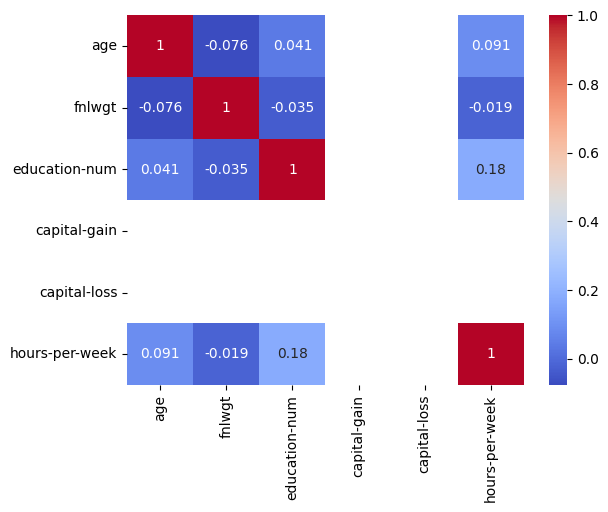

In [22]:
sns.heatmap(corr,annot=True,cmap='coolwarm')

In [23]:
census_data_encoded=census_data.drop(columns=['fnlwgt'], inplace=True)

In [24]:
census_data_encoded = pd.get_dummies(census_data, drop_first=True)

In [25]:
census_data_encoded.head()

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income_<=50K.,income_>50K,income_>50K.
0,39.0,13.0,0,0,40.0,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
1,50.0,13.0,0,0,32.5,False,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
2,38.0,9.0,0,0,40.0,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False
3,53.0,7.0,0,0,40.0,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False
4,28.0,13.0,0,0,40.0,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [26]:
#census_data_encoded=census_data_encoded.astype(int) #converting true/false to 0/1
census_data_encoded = census_data_encoded.astype(int)
census_data_encoded.head()

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income_<=50K.,income_>50K,income_>50K.
0,39,13,0,0,40,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,50,13,0,0,32,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,38,9,0,0,40,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
3,53,7,0,0,40,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
4,28,13,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
census_data_encoded.shape

(47514, 99)

In [28]:
census_data['income'] = census_data['income'].replace('<=50K.', '<=50K')
census_data['income'] = census_data['income'].replace('>50K.', '>50K')

In [29]:
census_data_copy = census_data.copy()

In [30]:
census_data_copy.drop(columns=['income'], inplace=True)

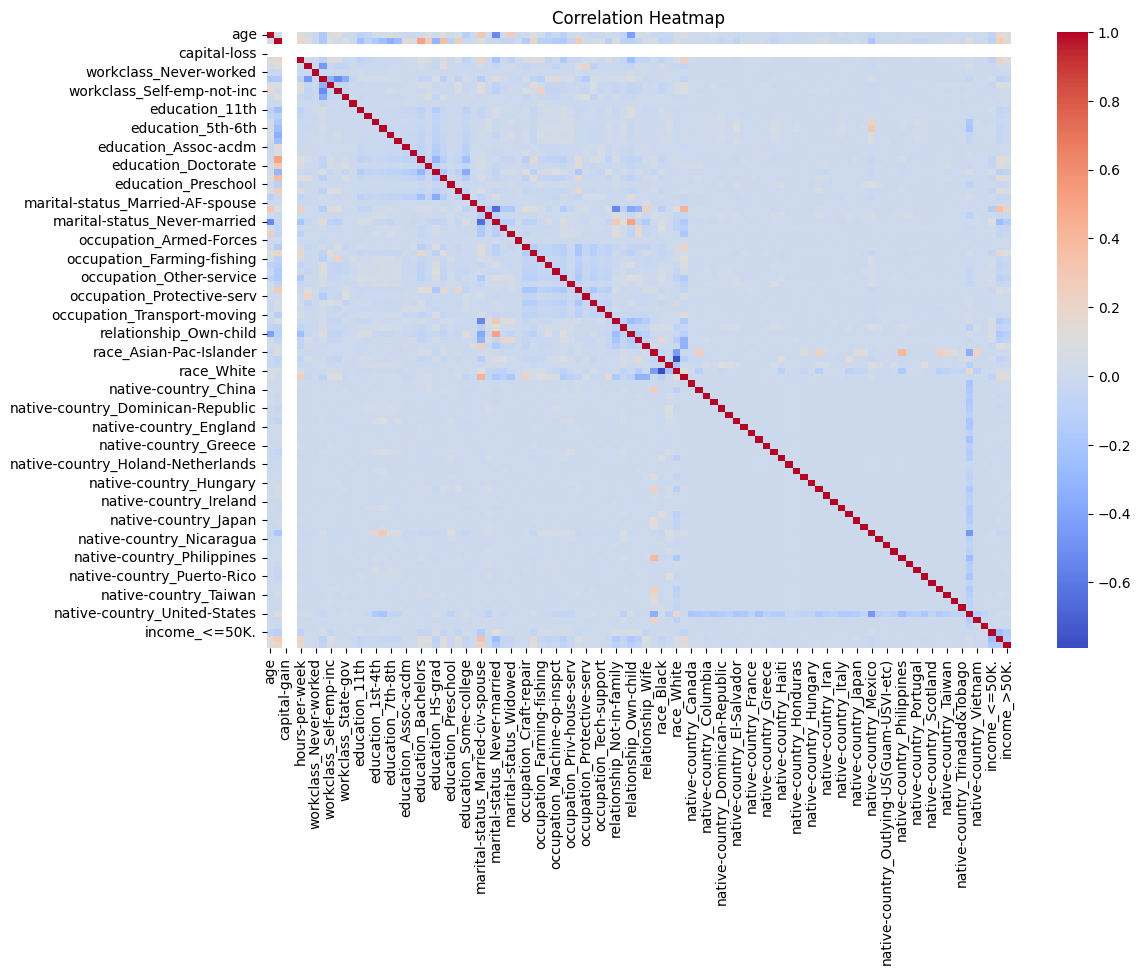

In [31]:
plt.figure(figsize=(12,8))
sns.heatmap(census_data_encoded.corr(), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap")
plt.show()

#Scaling

In [32]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(census_data_encoded)

In [33]:
X_scaled = pd.DataFrame(X_scaled, columns=census_data_encoded.columns)
X_scaled.head()

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income_<=50K.,income_>50K,income_>50K.
0,0.035247,1.157899,0.0,0.0,-0.165031,-0.25458,-0.013764,-1.801066,-0.185039,-0.284551,...,-0.046383,-0.03526,-0.024283,-0.021523,0.296814,-0.041068,-0.021523,-0.562426,-0.444568,-0.283989
1,0.865371,1.157899,0.0,0.0,-1.486005,-0.25458,-0.013764,-1.801066,-0.185039,3.514311,...,-0.046383,-0.03526,-0.024283,-0.021523,0.296814,-0.041068,-0.021523,-0.562426,-0.444568,-0.283989
2,-0.040219,-0.441659,0.0,0.0,-0.165031,-0.25458,-0.013764,0.555227,-0.185039,-0.284551,...,-0.046383,-0.03526,-0.024283,-0.021523,0.296814,-0.041068,-0.021523,-0.562426,-0.444568,-0.283989
3,1.091769,-1.241438,0.0,0.0,-0.165031,-0.25458,-0.013764,0.555227,-0.185039,-0.284551,...,-0.046383,-0.03526,-0.024283,-0.021523,0.296814,-0.041068,-0.021523,-0.562426,-0.444568,-0.283989
4,-0.794877,1.157899,0.0,0.0,-0.165031,-0.25458,-0.013764,0.555227,-0.185039,-0.284551,...,-0.046383,-0.03526,-0.024283,-0.021523,-3.369113,-0.041068,-0.021523,-0.562426,-0.444568,-0.283989


#PCA

In [34]:
pca = PCA().fit(X_scaled)
explained_variance = pca.explained_variance_ratio_

import numpy as np
cum_var = np.cumsum(explained_variance)
print(cum_var)

[0.03842293 0.06577539 0.09170337 0.11286604 0.13172378 0.1495617
 0.16566763 0.1807649  0.19534523 0.20882233 0.22209408 0.23499058
 0.24747552 0.25974797 0.27182731 0.28380288 0.29558464 0.30720925
 0.31878531 0.33027102 0.34159281 0.35283301 0.36403242 0.3751097
 0.38614742 0.39714413 0.40808693 0.41901531 0.42985495 0.44062662
 0.45136255 0.46202477 0.47264346 0.48316318 0.49366912 0.50412836
 0.51453292 0.52491329 0.53529051 0.54564026 0.55598533 0.56631933
 0.57664695 0.58697109 0.59729484 0.60761534 0.61793429 0.62825083
 0.63856541 0.64887806 0.65918405 0.66947951 0.67976968 0.69005121
 0.70032866 0.7105906  0.72084361 0.73104917 0.74123512 0.75140327
 0.76155274 0.77169088 0.78178194 0.79183408 0.80183729 0.81183349
 0.82176238 0.83162913 0.84148918 0.85132768 0.86101877 0.87064743
 0.88011606 0.8895288  0.89893476 0.90816768 0.91717295 0.92597429
 0.93456977 0.94297649 0.95100171 0.95816411 0.96510743 0.97198016
 0.97834979 0.98314526 0.98785342 0.99151574 0.99482152 0.996832

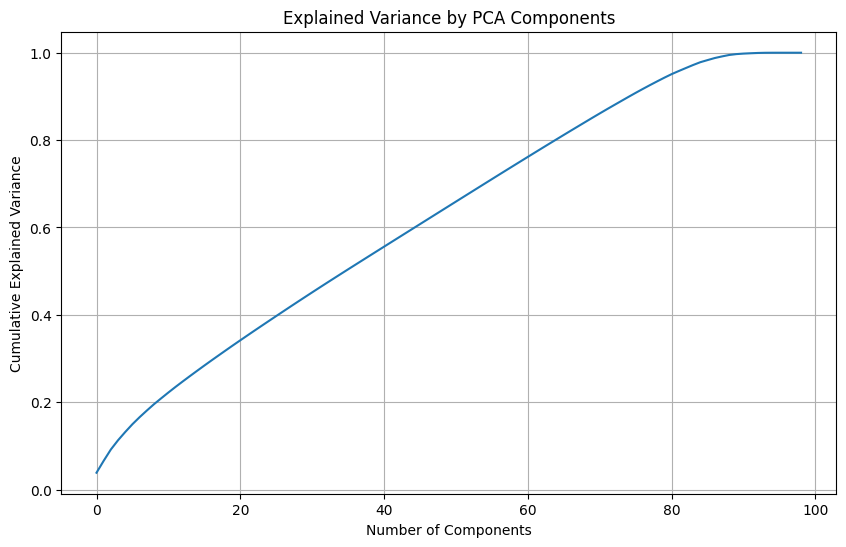

In [35]:
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.grid()
plt.show()

In [38]:
pca = PCA(n_components=0.9)
adult_df_pca = pca.fit_transform(X_scaled)

print(f"Number of components retained: {pca.n_components_}")
adult_df_pca = pd.DataFrame(adult_df_pca, columns=[f'PC_{i+1}' for i in range(adult_df_pca.shape[1])])
adult_df_pca.head()

Number of components retained: 76


,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,...,PC_67,PC_68,PC_69,PC_70,PC_71,PC_72,PC_73,PC_74,PC_75,PC_76
0,0.575656,2.549396,0.604681,-0.049957,1.244957,-1.910636,1.083832,0.774462,0.287672,0.904516,...,0.628634,0.194878,0.955709,0.724677,-0.155641,0.169229,-1.279825,-0.042746,0.845901,-0.363353
1,2.845074,0.434130,0.007823,0.202048,0.482252,-1.458718,0.377966,-0.337953,-1.822558,-0.255165,...,-0.436576,-0.355866,0.125418,-0.514134,-0.305562,0.261234,0.085917,0.136931,0.776713,0.307709
2,-0.931724,-0.461725,-1.321231,-0.265600,-0.027322,0.457702,1.576291,0.426356,1.419248,0.636208,...,0.300907,-0.252342,-0.538294,-0.808649,0.727588,0.664612,-0.399609,0.431742,0.362498,0.549604
3,-1.087591,-1.931501,0.141405,1.029728,-3.036674,-0.046524,-0.994248,1.917455,0.685034,-1.703377,...,0.500649,-0.555762,-0.887682,-1.194135,0.210148,1.520735,-0.467328,0.079750,0.687073,-0.650620
4,0.351153,-0.888103,4.579925,0.197079,0.378945,1.778934,-3.498538,1.055702,-0.622619,0.346927,...,-0.973860,-1.025329,0.893330,-1.026648,1.747910,1.137956,0.857589,-0.958569,0.194086,-3.708997


##KMeans

In [39]:
wcss=[]
sil=[]
for i in range(2,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
  kmeans.fit(adult_df_pca)
  wcss.append(kmeans.inertia_)
  labels=kmeans.predict(adult_df_pca)
  sil_score=silhouette_score(adult_df_pca,labels)
  print('wcss and silhoute score for k={} is {} and {}'.format(i,kmeans.inertia_,sil_score))
  sil.append(sil_score)


wcss

wcss and silhoute score for k=2 is 4051699.6807774534 and 0.06140983675852013
wcss and silhoute score for k=3 is 3970400.5120221456 and 0.040291046257717025
wcss and silhoute score for k=4 is 3933718.891289621 and 0.049895482502855276
wcss and silhoute score for k=5 is 3847041.5510076904 and 0.032096650429435755
wcss and silhoute score for k=6 is 3790326.776540636 and 0.030768355238661813
wcss and silhoute score for k=7 is 3754659.162610596 and 0.04111805771229687
wcss and silhoute score for k=8 is 3708193.6830834583 and 0.047202494633402765
wcss and silhoute score for k=9 is 3643787.1489356533 and 0.05256314162455936
wcss and silhoute score for k=10 is 3602225.8534643003 and 0.03663277536550723


[4051699.6807774534,
 3970400.5120221456,
 3933718.891289621,
 3847041.5510076904,
 3790326.776540636,
 3754659.162610596,
 3708193.6830834583,
 3643787.1489356533,
 3602225.8534643003]

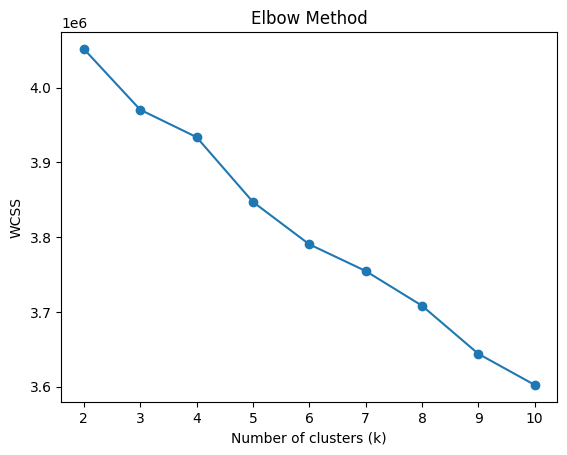

In [40]:
plt.plot(range(2, 11), wcss, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

In [41]:
k = 2  # Best number of clusters based on silhouette: 2

kmeans = KMeans(n_clusters= k, init='k-means++', max_iter=300, n_init=10, random_state=0)
labels = kmeans.fit_predict(adult_df_pca)  # or X_scaled

# Add cluster labels to your dataset
census_data['kmeans_cluster'] = labels

In [42]:
comparison_df = pd.crosstab(census_data['kmeans_cluster'], census_data['income'])
comparison_df

income,<=50K,>50K
kmeans_cluster,,
0,23790,922
1,12337,10465


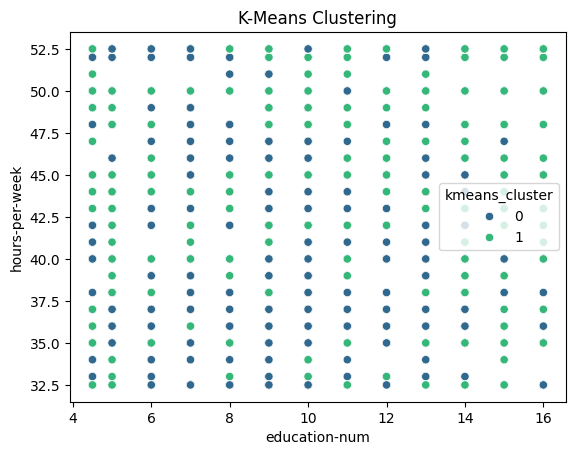

In [44]:
census_data['kmeans_cluster'] = labels
sns.scatterplot(x='education-num',y='hours-per-week',hue='kmeans_cluster',data=census_data,palette='viridis')
plt.title('K-Means Clustering')
plt.xlabel('education-num')
plt.ylabel('hours-per-week')
plt.show()

#Agglomerative clustering

In [45]:
sample_size = 10000 #  adjust this number based on our memory and visualization needs
X = adult_df_pca.sample(n=min(len(adult_df_pca), sample_size), random_state=42).values

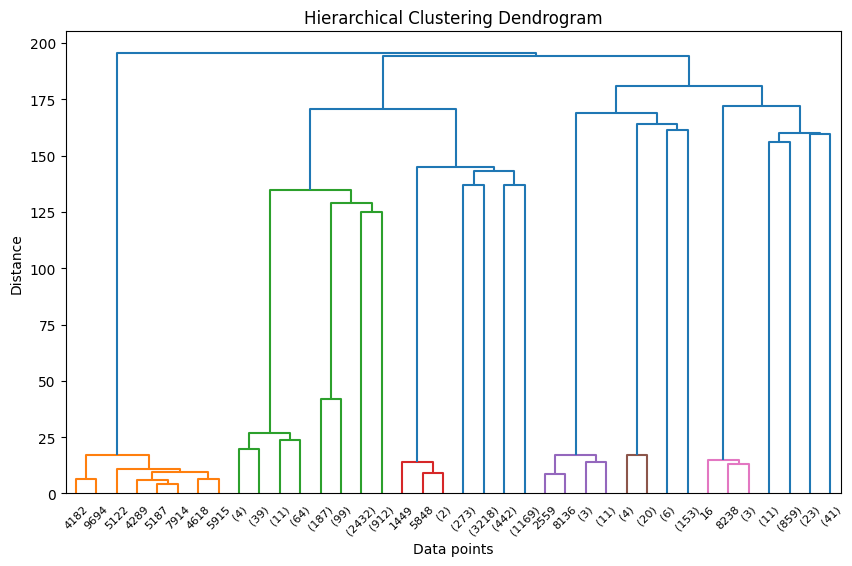

In [46]:
mergings = linkage(X, method='ward')
plt.figure(figsize=(10,6))
dendrogram(mergings, truncate_mode='level', p=5)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Data points")
plt.ylabel("Distance")
plt.show()

In [47]:
scores = {}
for k in range(2, 5):  # silhouette needs at least 2 clusters
    hc = AgglomerativeClustering(n_clusters=k, linkage='ward')
    labels = hc.fit_predict(X)
    sil_score = silhouette_score(X, labels)
    scores[k] = sil_score
    print(f"k={k}, silhouette score={sil_score:.3f}")

# Best k
best_k = max(scores, key=scores.get)
print("Best number of clusters based on silhouette: ", best_k)

k=2, silhouette score=0.781
k=3, silhouette score=0.462
k=4, silhouette score=0.441
Best number of clusters based on silhouette:  2


In [ ]:
#keep crashing after this

In [ ]:
k = best_k
hc = AgglomerativeClustering(n_clusters=k, linkage='ward')
labels = hc.fit_predict(adult_df_pca)

census_data['hc_cluster'] = labels

In [ ]:
census_data['hc_cluster'].value_counts()

In [1]:

comparison_df =  pd.crosstab(census_data['hc_cluster'],census_data['income'])
comparison_df

NameError: name 'pd' is not defined